In [1]:
try:
    import perlin_noise
except ImportError:
    !pip install perlin-noise
    import perlin_noise

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def plot_noise(
    time: float,
    speed: float = 1.0,
    scale: float = 1.0,
    octaves: int = 3,
    seed: int = 42,
    N: int | tuple[int, int] = 100,
    levels: int = 7,
):
    """
    Generate a 2D plot of the perlin noise at a given time.
    """
    if isinstance(N, int):
        Nx, Ny = N, N
    else:
        Nx, Ny = N

    noise = perlin_noise.PerlinNoise(octaves=octaves, seed=seed)

    # project time onto 2 orthogonal vectors, such that one unit
    # of time corresponds to one rotation of the unit circle
    t_x, t_y = np.cos(time * 2 * np.pi), np.sin(time * 2 * np.pi)
    t_x, t_y = t_x * speed, t_y * speed

    # create a grid of NxN points
    noise_values = np.zeros((Nx, Ny))
    norm = min(Nx, Ny) / scale
    for i in range(Nx):
        for j in range(Ny):
            x, y = i / norm, j / norm
            noise_values[i, j] = noise([x, y, t_x, t_y])

    # contourf
    # create a figure where the smallest dimension is 3
    lo = min(Nx, Ny)
    plt.figure(figsize=(Nx / lo * 3, Ny / lo * 3), dpi=250)
    plt.contourf(
        noise_values.T,
        cmap="cool",
        # origin="lower",
        levels=np.linspace(-0.5, 0.5, levels),
        extend="both",
    )
    # add black lines
    plt.contour(
        noise_values.T,
        # origin="lower",
        colors="black",
        # don't show dashed lines below 0
        levels=np.linspace(-0.5, 0.5, levels),
        extend="both",
    )
    plt.axis("off")
    plt.gca().set_aspect("equal")

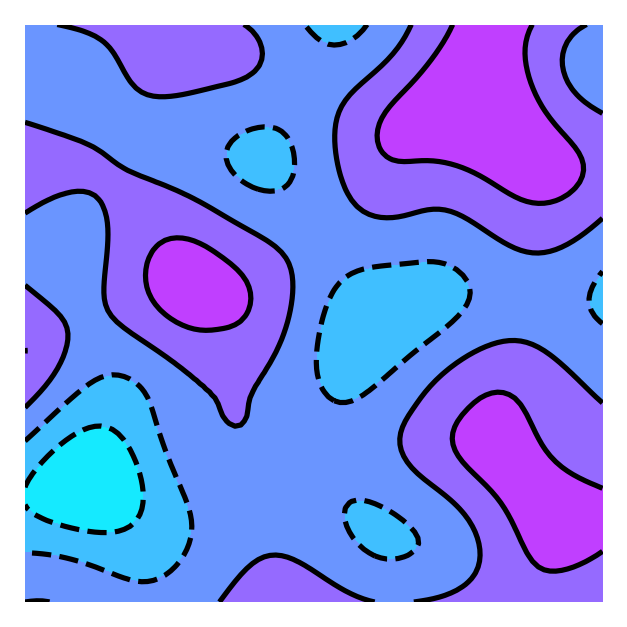

In [3]:
plot_noise(0)


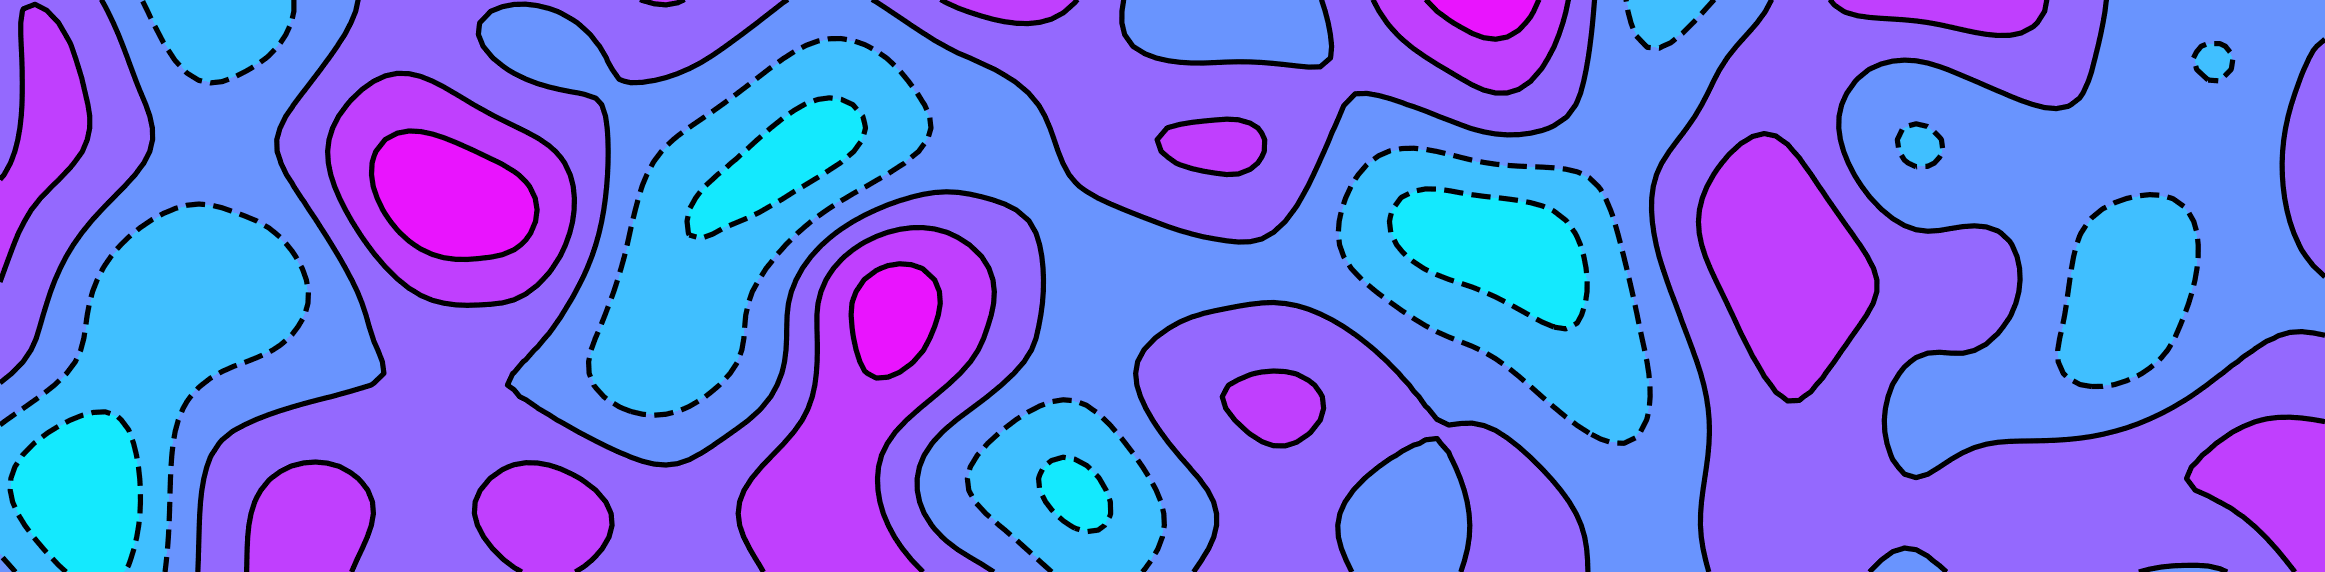

In [4]:
from functools import partial

from make_a_gif import gif

gif(
    np.linspace(0, 1, 50).tolist(),
    partial(
        plot_noise, speed=0.1, octaves=3, scale=0.8, N=(200, 50), seed=123
    ),
    fps=12,
    css={"width": "600px"},
    save_to="outputs/noise",
    savefig_kwargs={"pad_inches": 0},
)